# Here we want to compute branch lengths according to the Moran process

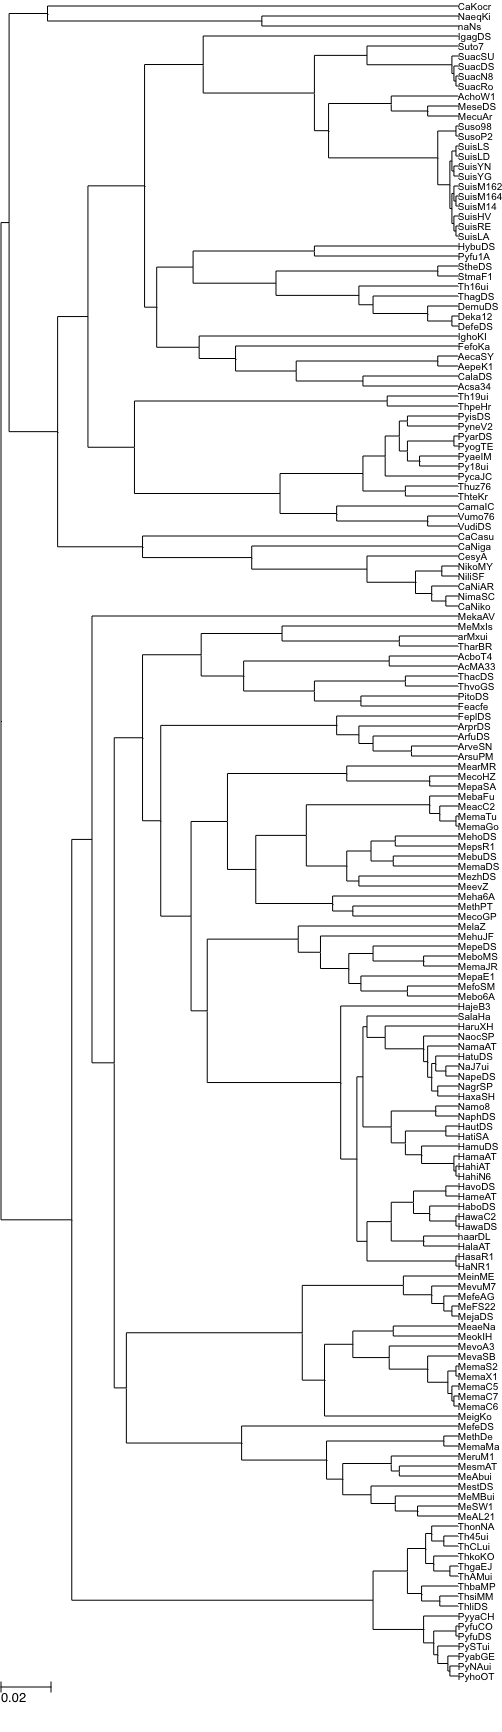

In [46]:
import sys
from ete3 import Tree, TreeStyle, NodeStyle
import numpy as np
import pandas as pd
import scipy.stats as stats


# Creates a chronogram
file="canonicalRootUltrametric.tree"

try:
    f=open(file, 'r')
except IOError:
    print ("Unknown file: "+file)
    sys.exit()

line = ""
for l in f:
    line += l.strip()
    
f.close()

treeToCalibrate = Tree( line )

ts = TreeStyle()
ts.min_leaf_separation= 0
ts.scale = 2020 
nstyle = NodeStyle()
nstyle["size"] = 0
for n in treeToCalibrate.traverse():
   n.set_style(nstyle)
treeToCalibrate.render("%%inline", tree_style=ts)  

## Now we change the node heights according to the Moran process

n: 168.0
335
167
167


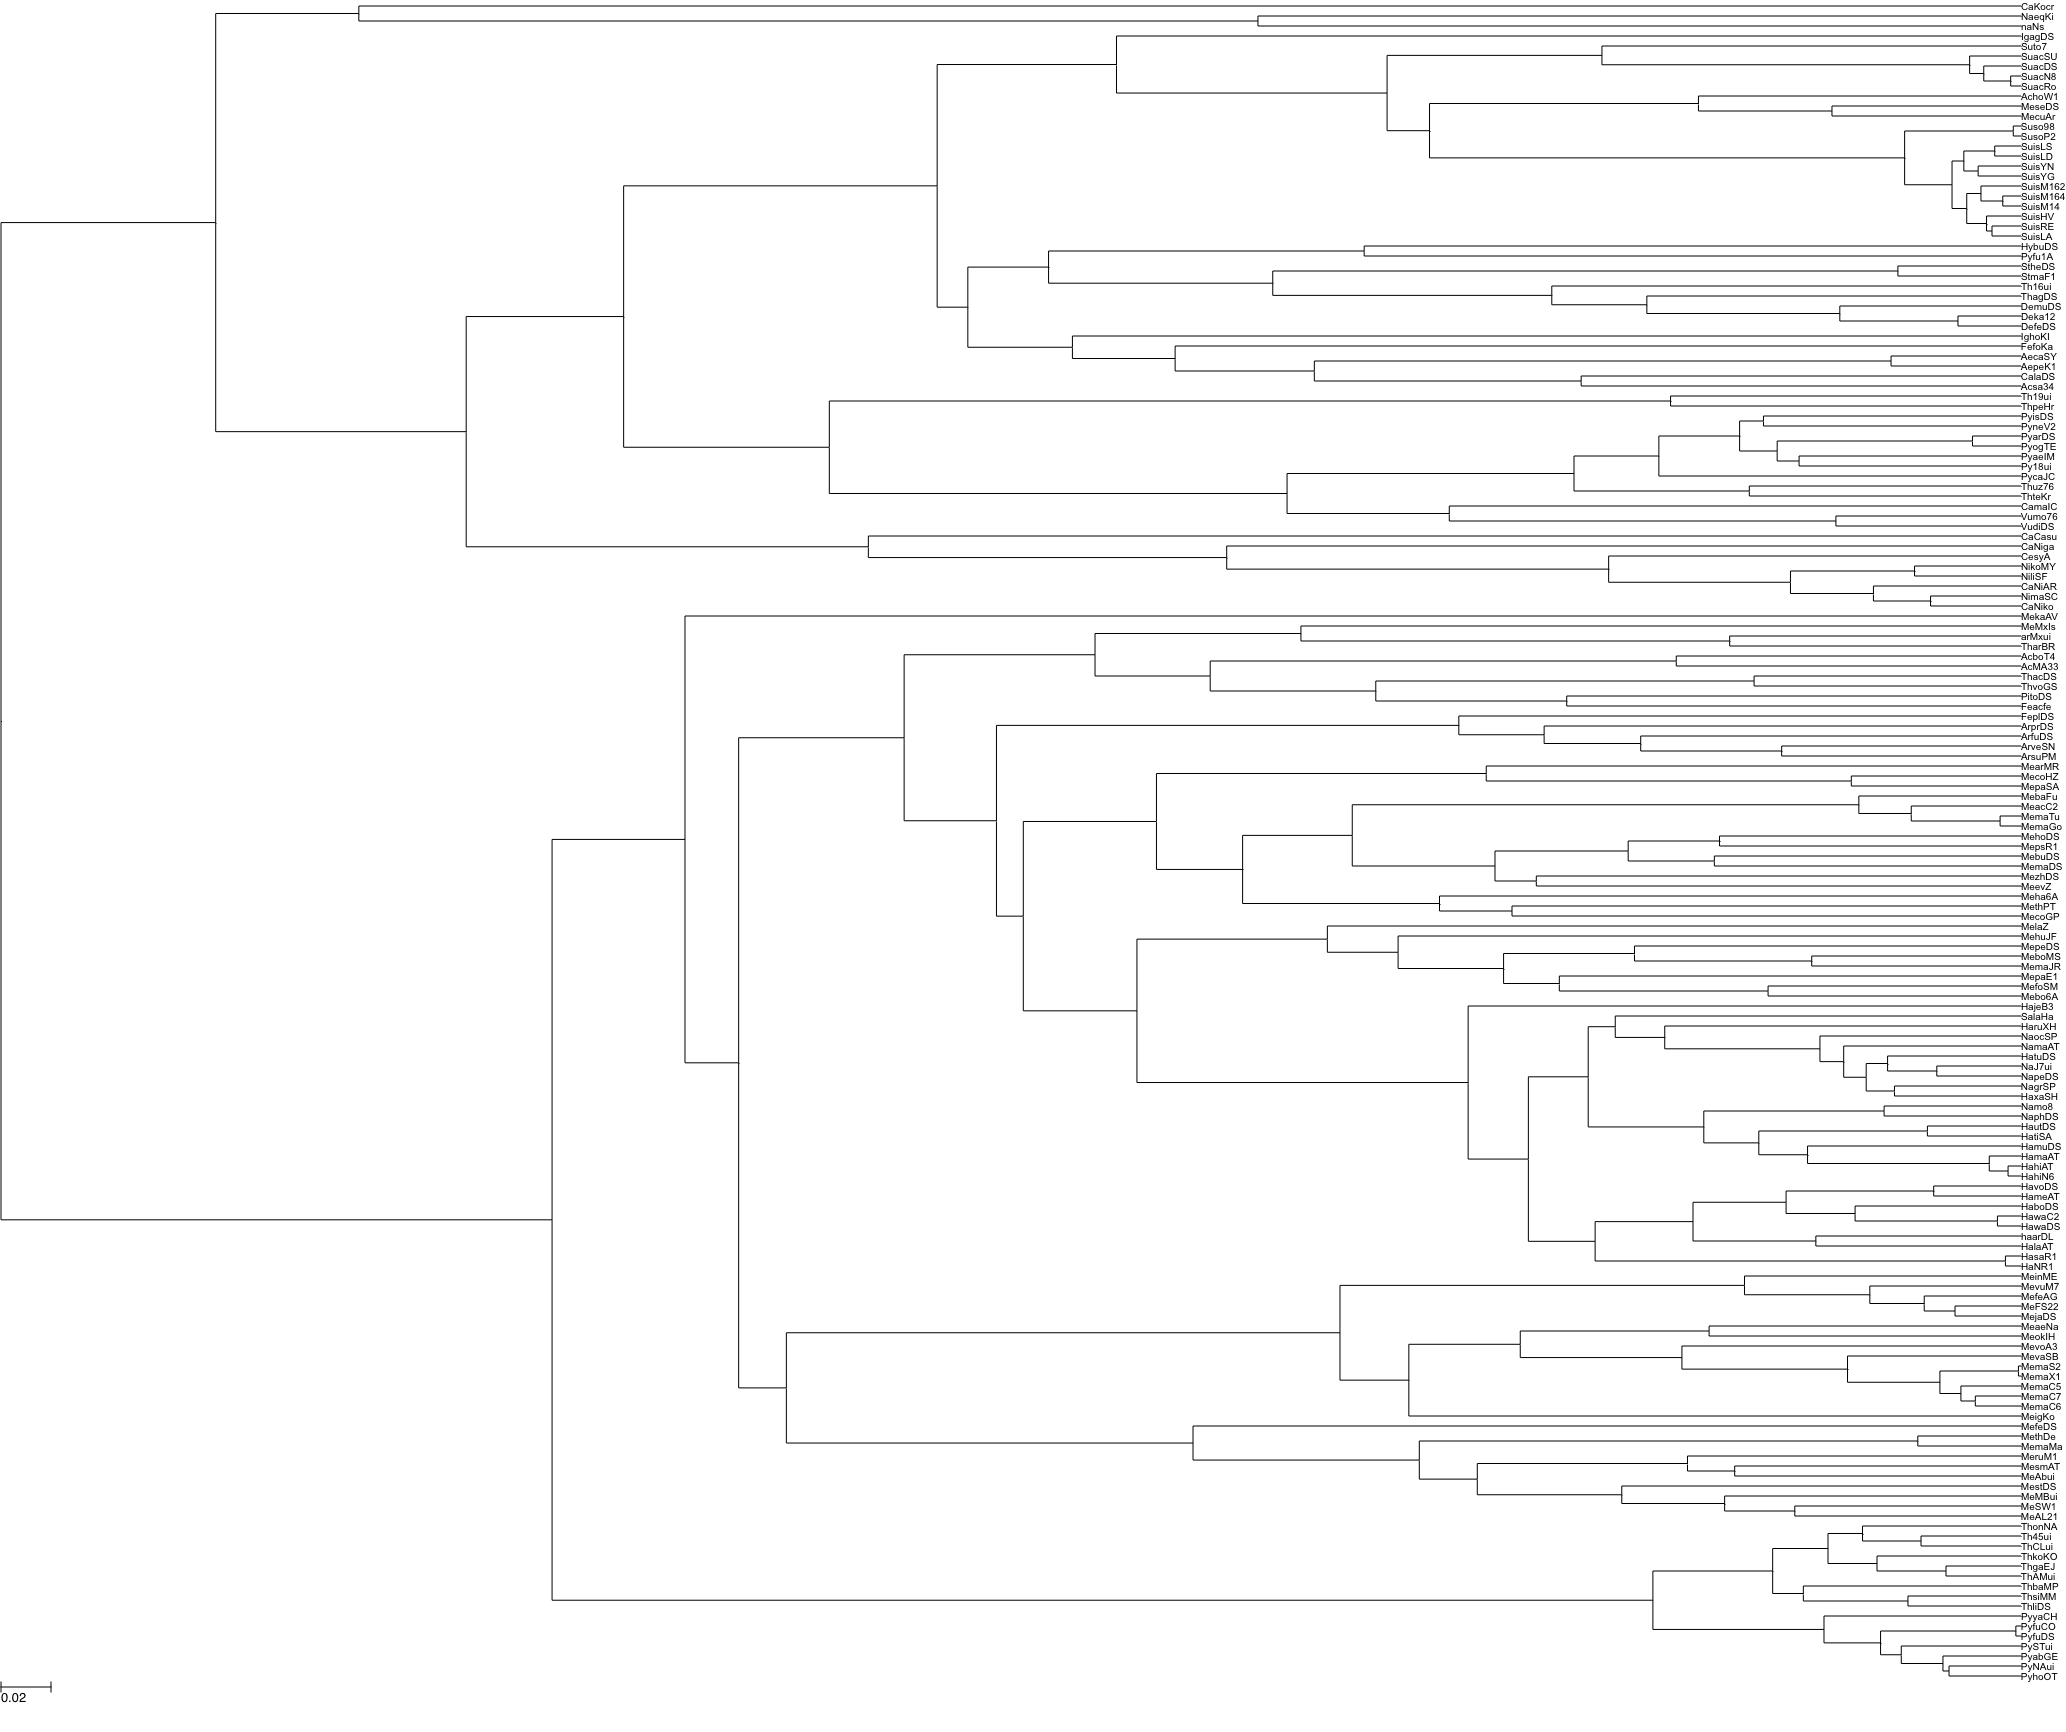

In [47]:
def getNodeHeights( t ):
    node2Height = dict()
    height2Node = dict()
    for node in t.traverse("postorder"):
        if node not in node2Height:
            node2Height[node] = 0.0
        if node.up:
            if True:#(node2Height[node] + node.dist) in height2Node:
                #print ("Degenerate tree, with several nodes at the same height: " + str(node2Height[node] + node.dist))
                noise = stats.uniform.rvs(size=1)[0]/100000
                newHeight = node2Height[node] + node.dist + noise
                height2Node[newHeight] = node.up
                node2Height[node.up] = newHeight
                if not node.up.is_root():
                    node.up.dist = node.up.dist - noise
            else:
                height2Node[node2Height[node] + node.dist] = node.up
      # print node.name + " : " + str(node2Height[node])
    return node2Height,height2Node

node2Height,height2Node = getNodeHeights(treeToCalibrate)
height2Node = dict()

for k,v in node2Height.items():
    if not k.is_leaf():
        height2Node[v] = k
    
rank = 0.0
rank_height = 0.0
n = float(len(treeToCalibrate.get_tree_root().get_leaves()))
newNode2Height = dict()
print("n: "+str(n))
print(len(node2Height))
print(len(height2Node))


for k in sorted(height2Node.keys()):
    #print("k: "+str(k)+ " rank: " + str(rank))
    v = height2Node[k]
    if not v.is_leaf():
        rank_height+=1.0/(n-rank)
        rank+=1
        newNode2Height[v]=rank_height
    else:
        print(v)

print(len(newNode2Height))

#for k in node2Height.keys():
#    print(k)
#    print (node2Height[k])
    
for node in treeToCalibrate.traverse("postorder"):
    if not node.is_root():
        #print (node)
        #if node.up not in newNode2Height:
            #print (node2Height[node])
            #print(node2Height[node.up])
        fathers_height = newNode2Height[node.up]
        if node.is_leaf():
            node.dist = fathers_height/rank_height
        else:
            node.dist = (fathers_height- newNode2Height[ node ])/rank_height

        
treeToCalibrate.render("%%inline", tree_style=ts)  